# Import libraries


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

pd.options.display.float_format = '{:.2f}'.format

# Import data

In [5]:
df = pd.read_excel("marketing_data.xlsx")

In [6]:
df.head()

,registration_date,traffic_type,id_partner,age_group,device,country_tier,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
0,2021-06-24,Google Search,1,35-,iOS,Tier_1,60,220.0,2.99,5,3,1
1,2021-09-13,Google Search,1,35-,MacOS,Tier_1,8,0.0,0.0,0,0,0
2,2021-07-12,Google Search,1,35-55,Android,Tier_1,121,2550.0,225.97,28,19,11
3,2021-03-26,Google Search,1,35-55,iOS,Tier_1,95,1900.0,351.92,23,9,2
4,2021-04-26,Google Search,1,35-,Android,Tier_1,51,915.0,256.09,7,2,2


In [7]:
num_rows, num_columns = df.shape
print("Amount of rows: ", num_rows)
print("Amount of columns: ", num_columns)

Amount of rows:  48248
Amount of columns:  12


In [8]:
col_names = df.columns
print("Column names: ", list(col_names))

Column names:  ['registration_date', 'traffic_type', 'id_partner', 'age_group', 'device', 'country_tier', 'registrations', 'users_acqusition_costs', 'revenue_7_days', 'logins_1_lt', 'logins_3_lt', 'logins_7_lt']


# Cleaning and counting missing data per column


In [9]:
print("\n Missing values per column: ", df.isnull().sum())



 Missing values per column:  registration_date         0
traffic_type              0
id_partner                0
age_group                 2
device                    0
country_tier              0
registrations             0
users_acqusition_costs    0
revenue_7_days            0
logins_1_lt               0
logins_3_lt               0
logins_7_lt               0
dtype: int64


## Drop missing values:


In [10]:
df.dropna(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.country_tier.unique()

array(['Tier_1', 'Tier_2', 'Tier_3'], dtype=object)

In [13]:
df.dtypes

registration_date         datetime64[ns]
traffic_type                      object
id_partner                         int64
age_group                         object
device                            object
country_tier                      object
registrations                      int64
users_acqusition_costs            object
revenue_7_days                    object
logins_1_lt                        int64
logins_3_lt                        int64
logins_7_lt                        int64
dtype: object

## Convert users_acqusition_costs and revenue_7_days columns from object format to float  

In [15]:
import re
import numpy as np

df.users_acqusition_costs = df.users_acqusition_costs.apply(lambda x: re.sub('\D', '', str(x)))
df.revenue_7_days = df.revenue_7_days.apply(lambda x: re.sub('\D', '', str(x)))

df = df.replace('', np.nan)
df.dropna(subset=['users_acqusition_costs', 'revenue_7_days'], axis=0, inplace=True)

df.users_acqusition_costs = df.users_acqusition_costs.astype('float64')
df.revenue_7_days = df.revenue_7_days.astype('float64')

## Found the outliers in the data and created plots with Matplotlib

{'whiskers': [<matplotlib.lines.Line2D at 0x11fd741c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11fd74700>,
 'boxes': [<matplotlib.lines.Line2D at 0x120073f70>],
 'medians': [<matplotlib.lines.Line2D at 0x11fd74c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fd74f10>],
 'means': []}

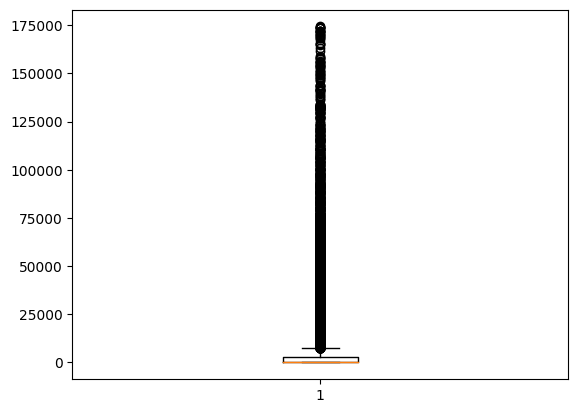

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df[df.users_acqusition_costs < 175000].users_acqusition_costs)

In [17]:
df = df[df.users_acqusition_costs < 175000]

{'whiskers': [<matplotlib.lines.Line2D at 0x11fd4d570>,
 'caps': [<matplotlib.lines.Line2D at 0x11fd4dab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fd4d2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11fd4dff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11fd4e290>],
 'means': []}

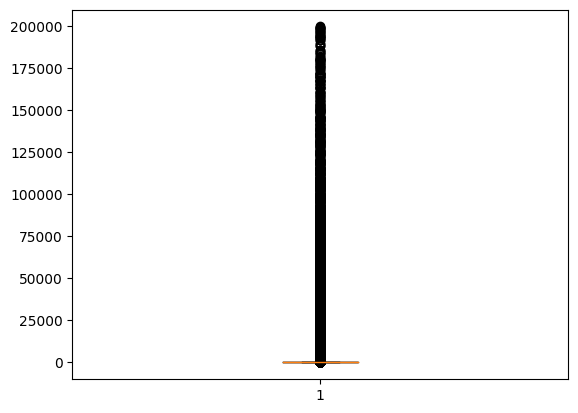

In [18]:
plt.boxplot(df[df.revenue_7_days < 200000].revenue_7_days)

In [19]:
df = df[df.revenue_7_days < 200000]

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
registration_date,42171,2021-06-07 13:03:29.746034176,2021-01-01 00:00:00,2021-03-19 00:00:00,2021-06-04 00:00:00,2021-08-28 00:00:00,2021-11-18 00:00:00,NaN
id_partner,42171.00,3.11,1.00,2.00,3.00,5.00,6.00,1.77
registrations,42171.00,35.28,1.00,2.00,5.00,25.00,2265.00,104.28
users_acqusition_costs,42171.00,3734.60,0.00,0.00,0.00,2077.50,174340.00,11672.77
revenue_7_days,42171.00,4414.87,0.00,0.00,0.00,0.00,199797.00,18053.08
logins_1_lt,42171.00,4.74,0.00,0.00,1.00,3.00,196.00,11.75
logins_3_lt,42171.00,2.66,0.00,0.00,0.00,2.00,118.00,6.58
logins_7_lt,42171.00,1.69,0.00,0.00,0.00,1.00,87.00,4.20


<h2>Conducted the analysis, the type of traffic with the most number of registrations</h2>

In [21]:
df.groupby("traffic_type").agg({'registrations': 'sum'}).sort_values(by='registrations', ascending=False) \
    .reset_index()


,traffic_type,registrations
0,Google Media,893169
1,Facebook,307994
2,Google Search,286801


([<matplotlib.patches.Wedge at 0x11fe87580>,
 [Text(-0.34078138924448353, 1.0458814678273058, 'Google Media'),
  Text(-0.3151264425001272, -1.0538953103782245, 'Facebook'),
  Text(0.9044185268488498, -0.626120697863085, 'Google Search')],
 [Text(-0.18588075776971827, 0.5704808006330758, '60.0%'),
  Text(-0.17188715045461483, -0.5748519874790315, '20.7%'),
  Text(0.4933191964630089, -0.34152038065259177, '19.3%')])

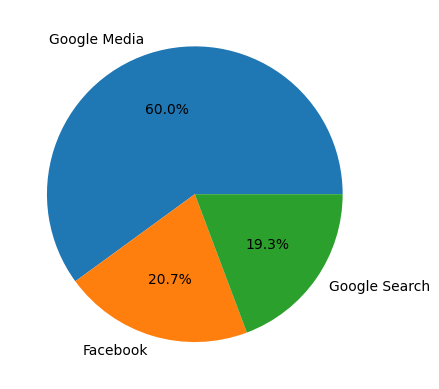

In [46]:
labels = 'Google Media', 'Facebook', 'Google Search'
sizes = [893169, 307994, 286801]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')


In [22]:
df.groupby('traffic_type').agg({'id_partner': 'nunique'})

,id_partner
traffic_type,
Facebook,2
Google Media,2
Google Search,2


<h2>Total revenue for each type of traffic</h2>

In [23]:
total_revenue_per_traffic = df.groupby("traffic_type")["revenue_7_days"].sum().sort_values(ascending=False)
print(total_revenue_per_traffic)

traffic_type
Google Search   106265464.00
Facebook         57860141.00
Google Media     22053915.00
Name: revenue_7_days, dtype: float64


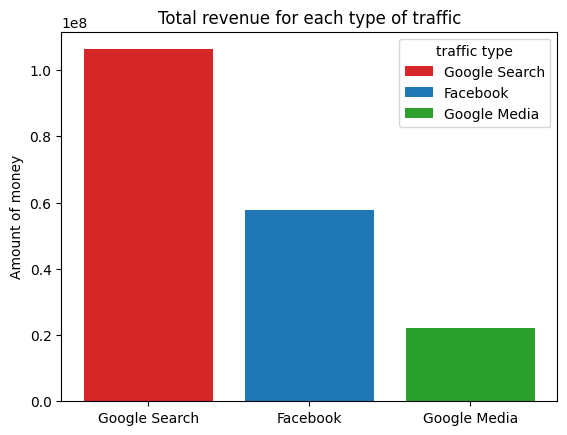

In [47]:
fig, ax = plt.subplots()

traffic_type = ['Google Search', 'Facebook', 'Google Media']
revenue = [106265464.00, 57860141.00, 22053915.00]
bar_labels = ['Google Search', 'Facebook', 'Google Media']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(traffic_type, revenue, label=bar_labels, color=bar_colors)

ax.set_ylabel('Amount of money')
ax.set_title('Total revenue for each type of traffic')
ax.legend(title='traffic type')

plt.show()

In [24]:
df.head(2)

,registration_date,traffic_type,id_partner,age_group,device,country_tier,registrations,users_acqusition_costs,revenue_7_days,logins_1_lt,logins_3_lt,logins_7_lt
0,2021-06-24,Google Search,1,35-,iOS,Tier_1,60,2200.00,299.00,5,3,1
1,2021-09-13,Google Search,1,35-,MacOS,Tier_1,8,0.00,0.00,0,0,0


<h2>Next step is ROI metric. This is <bold>Return on investment (ROI)</bold> is a performance measure used to evaluate the efficiency or profitability of an investment or compare the efficiency of a number of different investments. ROI tries to directly measure the amount of return on a particular investment, relative to the investment’s cost. </h2>

In [97]:
df_ROI = df.groupby(['traffic_type', 'id_partner']).agg({'revenue_7_days': 'sum', 'users_acqusition_costs': 'sum'})\
    .sort_values(by='revenue_7_days', ascending=False).reset_index()

In [98]:
df_ROI['ROI'] = (df_ROI.revenue_7_days - df_ROI.users_acqusition_costs) / df_ROI.users_acqusition_costs * 100

In [99]:
df_ROI

,traffic_type,id_partner,revenue_7_days,users_acqusition_costs,ROI
0,Google Search,1,70929421.00,33552152.00,111.40
1,Google Search,2,35336043.00,35377327.00,-0.12
2,Facebook,4,32918699.00,31691159.00,3.87
3,Facebook,3,24941442.00,17841200.00,39.80
4,Google Media,6,13803815.00,29111829.00,-52.58
5,Google Media,5,8250100.00,9918318.00,-16.82


<h3>For a full picture of revenues, it's a good idea to calculate the CPL parameter. CPL is a metric used to assess the efficiency of online marketing. It shows how much an advertiser pays to attract one lead on a particular advertising channel</h3>

In [93]:
df_CPL = df.groupby(['traffic_type', 'id_partner']).agg({'users_acqusition_costs': 'sum', 'registrations': 'sum'})\
    .reset_index()

In [94]:
df_CPL

,traffic_type,id_partner,users_acqusition_costs,registrations
0,Facebook,3,17841200.00,98019
1,Facebook,4,31691159.00,209975
2,Google Media,5,9918318.00,404310
3,Google Media,6,29111829.00,488859
4,Google Search,1,33552152.00,158036
5,Google Search,2,35377327.00,128765


In [95]:
df_CPL['CPL'] = df_CPL.users_acqusition_costs / df_CPL.registrations

In [96]:
df_CPL.sort_values(by='CPL', ascending=False)

,traffic_type,id_partner,users_acqusition_costs,registrations,CPL
5,Google Search,2,35377327.00,128765,274.74
4,Google Search,1,33552152.00,158036,212.31
0,Facebook,3,17841200.00,98019,182.02
1,Facebook,4,31691159.00,209975,150.93
3,Google Media,6,29111829.00,488859,59.55
2,Google Media,5,9918318.00,404310,24.53


In this cell, we can see the most active group and its average spend in the defined traffic types

In [65]:
df.groupby('age_group').agg({'revenue_7_days': ['mean', 'count']})\
    .reset_index().sort_values(by=('revenue_7_days',   'mean'), ascending=False)

age_group revenue_7_days       
                      mean  count
2       55+        6708.96  13100
1     35-55        5426.63  14018
0       35-        1476.23  15053

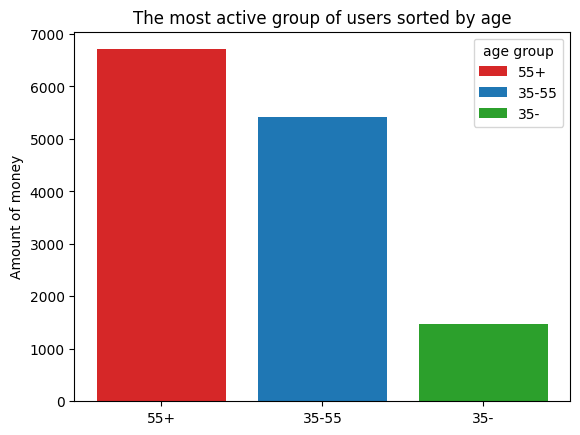

In [72]:
fig, ax = plt.subplots()
age_group = ['55+', '35-55', '35-']
mean_spend = [6708.96, 5426.63, 1476.23]
bar_labels = ['55+', '35-55', '35-']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']

ax.bar(age_group, mean_spend, label=bar_labels, color=bar_colors)

ax.set_ylabel('Amount of money')
ax.set_title('The most active group of users sorted by age')
ax.legend(title='age group')

plt.show()

## In this section, we found dependencies between average profit and used device

In [67]:
df_mean_profit = df.groupby('device').agg({'logins_1_lt': 'sum', 'revenue_7_days': 'sum'}).reset_index()

In [68]:
df_mean_profit['Mean_Profit'] = df_mean_profit.revenue_7_days / df_mean_profit.logins_1_lt

In [69]:
df_mean_profit.sort_values(by='Mean_Profit', ascending=False)

,device,logins_1_lt,revenue_7_days,Mean_Profit
1,MacOS,11383,21777264.00,1913.14
3,Windows,33738,37141134.00,1100.87
4,iOS,58027,62242430.00,1072.65
0,Android,90979,61389079.00,674.76
2,Other,5672,3629613.00,639.92


([<matplotlib.patches.Wedge at 0x1243f0190>,
 [Text(0.48642263304795097, 0.9866068224265928, 'MacOS'),
  Text(-1.0584271863856125, 0.2995528185810242, 'Windows'),
  Text(-0.6050433462574505, -0.9186525726027152, 'iOS'),
  Text(0.46249214184066345, -0.9980486053973704, 'Android'),
  Text(1.0246833438315928, -0.40003005496350635, 'Other')],
 [Text(0.2653214362079732, 0.5381491758690505, '35.4%'),
  Text(-0.5773239198466977, 0.1633924464987405, '20.4%'),
  Text(-0.33002364341315477, -0.5010832214196628, '19.9%'),
  Text(0.2522684410039982, -0.5443901483985656, '12.5%'),
  Text(0.5589181875445051, -0.21819821179827617, '11.8%')])

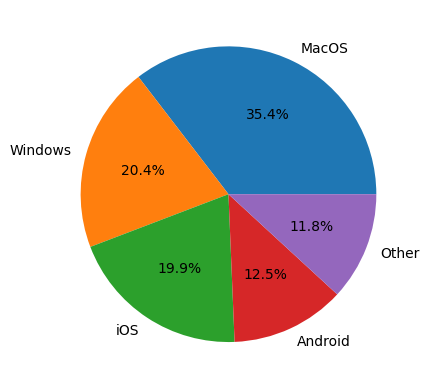

In [70]:
labels = 'MacOS', 'Windows', 'iOS', 'Android', 'Other'
sizes = [1913.14, 1100.87, 1072.65, 674.76, 639.92]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

In [71]:
df_mean_profit = df.groupby('device').agg({'logins_7_lt': 'sum', 'revenue_7_days': 'sum'}).reset_index()
df_mean_profit['Mean_Profit'] = df_mean_profit.revenue_7_days / df_mean_profit.logins_7_lt
df_mean_profit.sort_values(by='Mean_Profit', ascending=False)

,device,logins_7_lt,revenue_7_days,Mean_Profit
1,MacOS,4311,21777264.00,5051.56
4,iOS,18380,62242430.00,3386.42
3,Windows,14246,37141134.00,2607.13
0,Android,32200,61389079.00,1906.49
2,Other,2069,3629613.00,1754.28


## ARPU (Average Revenue Per User) is the average revenue received from one user.

In [87]:
df_ARPU = df.groupby(['traffic_type', 'age_group']).agg({'revenue_7_days': 'sum', 'registrations': 'sum'}).sort_values(by='revenue_7_days', ascending=False).reset_index()

In [88]:
df_ARPU['ARPU'] = df_ARPU.revenue_7_days/df_ARPU.registrations

In [89]:
df_ARPU

,traffic_type,age_group,revenue_7_days,registrations,ARPU
0,Google Search,55+,47611752.00,94310,504.84
1,Google Search,35-55,45177907.00,117890,383.22
2,Facebook,55+,29003408.00,141392,205.13
3,Facebook,35-55,24983616.00,136970,182.40
4,Google Search,35-,13475805.00,74601,180.64
5,Google Media,55+,11272185.00,269273,41.86
6,Google Media,35-55,5908922.00,219066,26.97
7,Google Media,35-,4872808.00,404830,12.04
8,Facebook,35-,3873117.00,29632,130.71


### In this case, we can see avg revenue for one week made by the 55+ category, and it's equal to 504,84 with 94310 registrations and the least profit from Facebook with their 29632 registrations but 130,71 profit

# According to analysis:
<ol>Google Search is the most profitable traffic type according to the analyse</ol>
<ol>The age category 55+ brought the most profit this week</ol>
<ol>Users using Apple Inc. equipment is ordered 2 times more often than users who use the Windows system and the Android system on their phones.</ol>
<ol>ROI (Return on Invesments) metrics show that Google Media is the least profitable resource and Google Search is the most profitable.</ol>
<ol>CPL (Cost Per Lead) metrics shows the most expensive and effective resource to attract user is Google Search instead of Facebook or Google Media</ol>
<ol>ARPU (Average Revenue Per User) metrics shows average revenue from one user and result is via Google Search in the category 55+	total revenue for 7 days is 47611752.00	with 94310 registrations and the average profit is 504.84</ol>


